In [1]:
import numpy as np
import cv2
import glob
from moviepy.editor import VideoFileClip
from IPython.display import HTML
# camera class

In [2]:
from camera import *
from line import *

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

In [ ]:
if os.path.exists('line_fit.p'):
	os.remove('line_fit.p')

# camera calibration matrix and distortion 

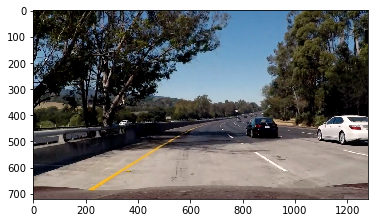

In [4]:
img = mpimage.imread('test_images/test5.jpg')
plt.imshow(img)

In [5]:
l = Line(img)

In [6]:
mtx, dist = l.mtx, l.dist

In [7]:
##  output the calibration and load

In [8]:
# calibration data will appear when example Line initial

# Apply a distortion correction to img

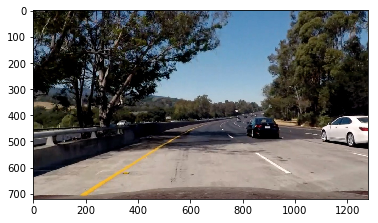

In [9]:
undist = l.undistort()
plt.imshow(undist)

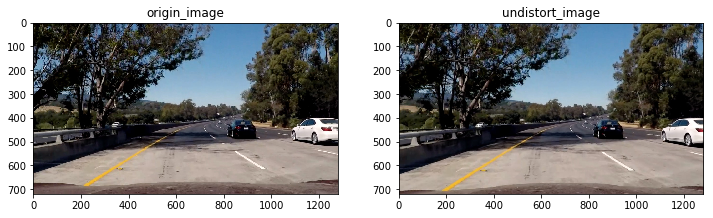

In [10]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(121, title='origin_image')
plt.imshow(img)
plt.subplot(122, title='undistort_image')
plt.imshow(undist)
fig.savefig('output_images/undistort.jpg')

# Use color transforms, gradients, etc., to create a thresholded binary image.

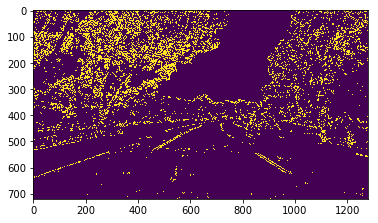

In [11]:
combined = l.combined_thresh()
plt.imshow(combined)
fig.savefig('output_images/combine_threshold.jpg')

# Apply a perspective transform to rectify binary image ("birds-eye view").

In [12]:
l.update_M_and_Minv()

(array([[ -4.97409326e-01,  -1.52170409e+00,   9.58341969e+02],
        [ -4.88498131e-15,  -1.89844560e+00,   8.54300518e+02],
        [ -5.20417043e-18,  -2.37766264e-03,   1.00000000e+00]]),
 array([[  1.40625000e-01,  -8.01552644e-01,   5.50000000e+02],
        [ -3.33066907e-15,  -5.26746725e-01,   4.50000000e+02],
        [ -6.07153217e-18,  -1.25242601e-03,   1.00000000e+00]]))

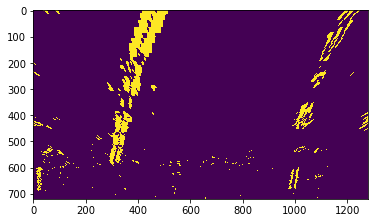

In [13]:
binary_top_down_image = l.transform_perspective()
plt.imshow(binary_top_down_image)

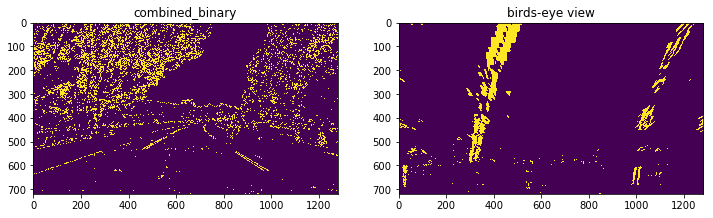

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(121, title='combined_binary')
plt.imshow(combined)
plt.subplot(122, title='birds-eye view')
plt.imshow(binary_top_down_image)
fig.savefig('output_images/binary_top_down_image.jpg')

# Detect lane pixels and fit to find the lane boundary.

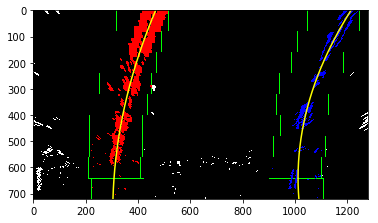

In [15]:
left_fit, right_fit = l.find_lines(figname= True)

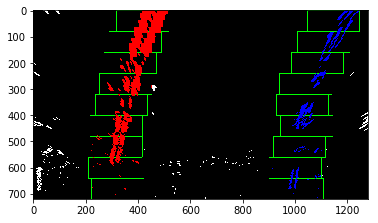

In [23]:
plt.imshow(l.out_img)
plt.savefig('output_images/find_lane_line.jpg')

# Determine the curvature of the lane and vehicle position with respect to center.

In [17]:
l.curvature()

599.813808809 m 333.103808486 m


(599.81380880881227, 333.10380848613431)

In [18]:
# distance from the center
l.distance_from_center()

0.14007142857142857

# Warp the detected lane boundaries back onto the original image.

In [19]:
result = l.display()

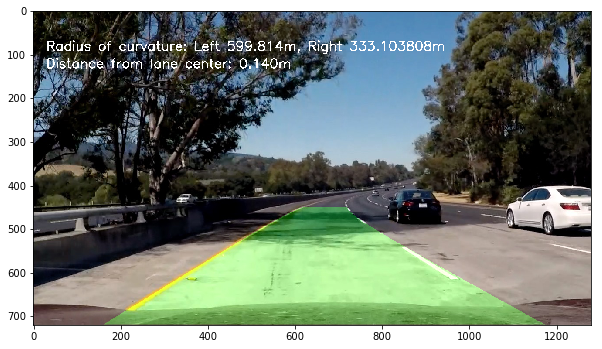

In [20]:
fig = plt.figure(figsize=(10, 8))
plt.imshow(result)
fig.savefig('output_images/result.jpg')

In [21]:
def pipeline(img):
    l = Line(img, auto=True)
    return(l.result)

# Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [ ]:
if os.path.exists('line_fit.p'):
	os.remove('line_fit.p')

In [ ]:
input_video = 'project_video.mp4'
clip = VideoFileClip(input_video).subclip(0,1)
# clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
output_clip = clip.fl_image(pipeline)
%time output_clip.write_videofile('ouput_' + input_video, audio=False)